In [2]:
import load_graph
import importlib
importlib.reload(load_graph)
import load_graph
import Expected_mod as ex 

expected modularity evaluation

In [3]:
# go through dic choose file automatically

import os
import networkx as nx
import time
path='mcp_acp_data//k10_l10//'
filelist=[i for i in os.listdir(path) if (i[-3:]=='txt' and i[10]=='1' and i[11]=='0' and i[12]=='_' )]
filelist.sort()
filelist

# run weighted louvain, save clustering
k=10
l=10
value=[]
T=[]
clustering=[]
#path='datasets//'
for graph in filelist:
    g=load_graph.read_g(path+graph)


    edge=[]
    p=[]
    for u,v,w in g.edges(data=True):
        edge.append((u,v))
        p.append(w['weight'])


    t1=time.time()
    cluster=nx.community.louvain_communities(g)
    t2=time.time()


    clustering.append(cluster)
    Emod=ex.APWP(edge,p,cluster)
    print('----------graph: ',graph,'----------')
    print('cluster:',cluster)
    print('-----------Ex modularity',Emod,'-----------')
    value.append(Emod)
    T.append(t2-t1)




# run ex mod, save time and value



----------graph:  evolving_k10_l10_p0.00.txt ----------
cluster: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}, {40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59}, {64, 65, 66, 67, 68, 69, 60, 61, 62, 63}, {70, 71, 72, 73, 74, 75, 76, 77, 78, 79}, {80, 81, 82, 83, 84, 85, 86, 87, 88, 89}, {96, 97, 98, 99, 90, 91, 92, 93, 94, 95}]
-----------Ex modularity 0.8982831724997824 -----------
----------graph:  evolving_k10_l10_p0.05.txt ----------
cluster: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}, {70, 71, 72, 73, 74, 75, 76, 77, 78, 79}, {80, 81, 82, 83, 84, 85, 86, 87, 88, 89}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59}, {64, 65, 66, 67, 68, 69, 60, 61, 62, 63}, {40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {96, 97, 98, 99, 90, 91, 92, 93, 9

[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1] 21
[0.8982831724997824, 0.8524725948617208, 0.7875005218347629, 0.7475430661498663, 0.6946937814207128, 0.6396755905092675, 0.597883074537757, 0.5454824063546514, 0.47558121689914534, 0.459866154262214, 0.4087846169133388, 0.378769363846619, 0.3651330135292945, 0.34661641771657203, 0.3646103462725332, 0.3447628285689839, 0.3405563549105525, 0.3473971636030611, 0.35720581662112466, 0.3401574305908607, 0.35011485371884554] 21


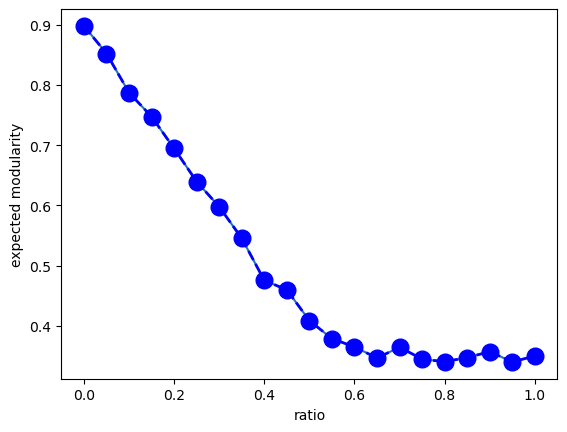

In [39]:
import matplotlib.pyplot as plt
list_=[1,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05,0]
list_.reverse()
print(list_,len(list_))
print(value,len(value))
#list_.reverse()
plt.plot(list_,value)
plt.plot(list_, value, color='blue', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.xlabel('ratio')
plt.ylabel('expected modularity')
plt.savefig('fig//ex_mod_ratio_weightedLouvain.pdf')

[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1] 21
[0.0072479248046875, 0.005235910415649414, 0.004806041717529297, 0.005373239517211914, 0.005194902420043945, 0.0052678585052490234, 0.006002902984619141, 0.006421089172363281, 0.006535768508911133, 0.007066011428833008, 0.00672602653503418, 0.007483959197998047, 0.007504940032958984, 0.008393049240112305, 0.0077800750732421875, 0.00890493392944336, 0.008491992950439453, 0.0077397823333740234, 0.008285045623779297, 0.007370948791503906, 0.009166955947875977] 21


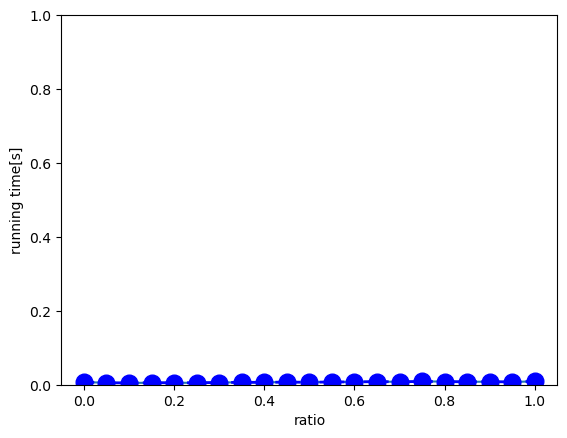

In [128]:
import matplotlib.pyplot as plt
list_=[1,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05,0]
list_.reverse()
print(list_,len(list_))
print(T,len(T))
#list_.reverse()
plt.plot(list_,T)
plt.plot(list_, T, color='blue', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.ylim(0, 1)
plt.xlabel('ratio')
plt.ylabel('running time[s]')
plt.savefig('fig//runningTime_ratio_weightedLouvain.pdf')

nmi evaluation

In [42]:

from sklearn.metrics.cluster import normalized_mutual_info_score as nmi


In [50]:
from Expected_mod import Trans_C2
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
print(clustering)
node=100
nomalized_cluster=Trans_C2(clustering[0],node)
print(nomalized_cluster)
NMI=[]
for c in clustering:
    c=Trans_C2(c,node)
    
    score=nmi(nomalized_cluster,c)
    print(score)
    NMI.append(score)


[[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}, {40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59}, {64, 65, 66, 67, 68, 69, 60, 61, 62, 63}, {70, 71, 72, 73, 74, 75, 76, 77, 78, 79}, {80, 81, 82, 83, 84, 85, 86, 87, 88, 89}, {96, 97, 98, 99, 90, 91, 92, 93, 94, 95}], [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {70, 71, 72, 73, 74, 75, 76, 77, 78, 79}, {80, 81, 82, 83, 84, 85, 86, 87, 88, 89}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59}, {64, 65, 66, 67, 68, 69, 60, 61, 62, 63}, {40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {96, 97, 98, 99, 90, 91, 92, 93, 94, 95}, {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}], [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {96, 97, 98, 99, 90, 91, 92, 93, 94, 95}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59}, {32, 33, 34, 35,

#### AMI

In [4]:
from Expected_mod import Trans_C2
from sklearn.metrics.cluster import adjusted_mutual_info_score as ami
print(clustering)
node=100
nomalized_cluster=Trans_C2(clustering[0],node)
print(nomalized_cluster)
AMI=[]
for c in clustering:
    c=Trans_C2(c,node)
    
    score=ami(nomalized_cluster,c)
    print(score)
    AMI.append(score)
print(AMI)

[[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}, {40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59}, {64, 65, 66, 67, 68, 69, 60, 61, 62, 63}, {70, 71, 72, 73, 74, 75, 76, 77, 78, 79}, {80, 81, 82, 83, 84, 85, 86, 87, 88, 89}, {96, 97, 98, 99, 90, 91, 92, 93, 94, 95}], [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}, {70, 71, 72, 73, 74, 75, 76, 77, 78, 79}, {80, 81, 82, 83, 84, 85, 86, 87, 88, 89}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59}, {64, 65, 66, 67, 68, 69, 60, 61, 62, 63}, {40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {96, 97, 98, 99, 90, 91, 92, 93, 94, 95}], [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {96, 97, 98, 99, 90, 91, 92, 93, 94, 95}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59}, {32, 33, 34, 35,

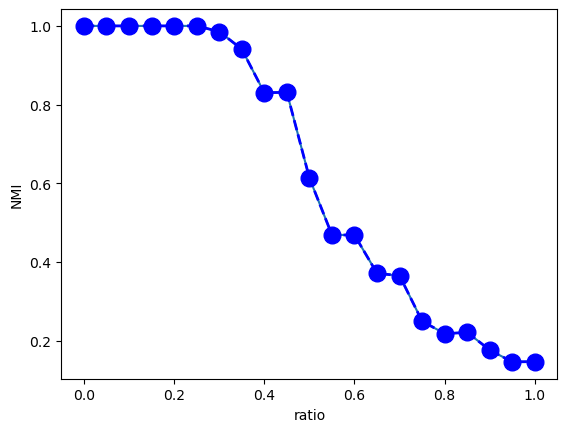

In [51]:
nmi_x=list_.copy()

plt.plot(nmi_x,NMI)
plt.plot(nmi_x,NMI, color='blue', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.xlabel('ratio')
plt.ylabel('NMI')
plt.savefig('fig//weigthedLouvain_nmi_ratio.pdf')

increasing k

In [121]:
from Expected_mod import Trans_C1
filelist1=[i for i in os.listdir('datasets') if i[-3:]=='txt' and i[-12:]=='l10_p0.7.txt' ]
def sum(l):
    s=0
    for i in l:
        s+=i

    return  s

l=10
X_=[]
NMI1=[]
for graph in filelist1:
    
    g=load_graph.read_g(path+graph)
    cluster1=nx.community.louvain_communities(g)
    
    # cut str
    strr=[]
    flag=0
   
    for _ in graph:
        if _=='k':
            
            flag=1
            continue
        if flag==0:
            continue
        if _<'0' or _>'9':
           
            break
        strr.append(_)
    
    k=sum([int(strr[i])*(10**(len(strr)-(i+1))) for i in range(len(strr))])
    c=[i for i in range(k*l)]
    
    stad_cluster=[c[x:x+l] for x in range(0, len(c), l)]
    
 
   
    cluster1=Trans_C2(cluster1,k*l)

    #print(Trans_C2(stad_cluster,k*l),cluster1)
    nmi_=nmi(Trans_C2(stad_cluster,k*l),cluster1)
    print(nmi_)
    NMI1.append(nmi_)
    X_.append(k)
    print('k:',k,'nmi',nmi_)
  
   
    
    




0.40106963135677115
k: 90 nmi 0.40106963135677115
0.4061055212240507
k: 97 nmi 0.4061055212240507
0.39300679717321924
k: 68 nmi 0.39300679717321924
0.40141146411576756
k: 82 nmi 0.40141146411576756
0.36796859763939954
k: 28 nmi 0.36796859763939954
0.40788007588768266
k: 85 nmi 0.40788007588768266
0.2903498096887707
k: 19 nmi 0.2903498096887707
0.41027724371865903
k: 59 nmi 0.41027724371865903
0.2885762333958521
k: 8 nmi 0.2885762333958521
0.3878840853210627
k: 84 nmi 0.3878840853210627
0.35725201979150173
k: 29 nmi 0.35725201979150173
0.3814800554503214
k: 83 nmi 0.3814800554503214
0.38282951545634814
k: 69 nmi 0.38282951545634814
0.4024351598044208
k: 96 nmi 0.4024351598044208
0.40752861261667916
k: 91 nmi 0.40752861261667916
0.39213078023474607
k: 58 nmi 0.39213078023474607
0.34713407615642305
k: 9 nmi 0.34713407615642305
0.33879474085449246
k: 18 nmi 0.33879474085449246
0.37101671011701937
k: 47 nmi 0.37101671011701937
0.32552364265494277
k: 12 nmi 0.32552364265494277
0.389500554585

In [131]:
print(NMI1)
print(X_)

[0.40106963135677115, 0.4061055212240507, 0.39300679717321924, 0.40141146411576756, 0.36796859763939954, 0.40788007588768266, 0.2903498096887707, 0.41027724371865903, 0.2885762333958521, 0.3878840853210627, 0.35725201979150173, 0.3814800554503214, 0.38282951545634814, 0.4024351598044208, 0.40752861261667916, 0.39213078023474607, 0.34713407615642305, 0.33879474085449246, 0.37101671011701937, 0.32552364265494277, 0.38950055458555716, 0.34333951731282586, 0.4020062703805747, 0.42215392616121655, 0.19169959097708061, 0.07468839395233771, 0.40121465724120214, 0.3670858878604799, 0.3630169831970999, 0.3926151872232364, 0.3967869045345451, 0.3792686720430691, 0.4090020213070023, 0.4204688292739537, 0.32633510882635347, 0.4220540452896847, 0.4180779039184398, 0.008403543249686092, 0.25124228384818403, 0.3665944934914313, 0.3811514789907963, 0.3361852381217956, 0.4155572609524061, 0.39252544121840316, 0.4171721742176737, 0.38765692893524356, 0.41405400947047516, 0.4254659781639817, 0.3767182907

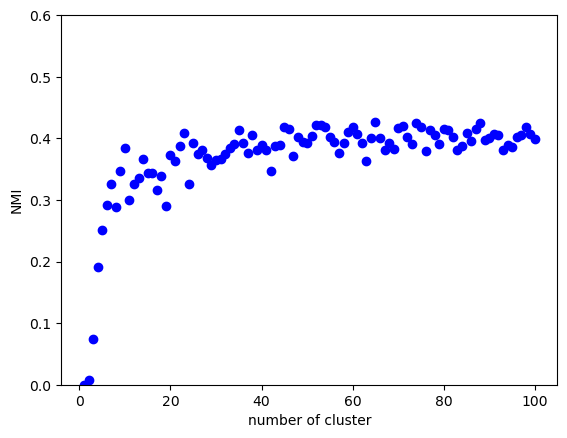

In [130]:

plt.plot(X_,NMI1, 'o',color='blue')
plt.ylim(0,0.6)
plt.xlabel('number of cluster')
plt.ylabel('NMI')
plt.savefig('fig//weightedLouvain_nmi_various_k.pdf')

### l10 p0.3

In [19]:
from Expected_mod import Trans_C1
from Expected_mod import Trans_C2
from sklearn.metrics.cluster import adjusted_mutual_info_score as ami 

def sum(l):
    s=0
    for i in l:
        s+=i

    return  s

path2='//Users//xinsh758//documents//academic//evaluation//Evaluation//mcp_acp_data//l10_p0.3//datasets//'

filelist1=[i for i in os.listdir(path2) if i[-3:]=='txt'  ]
filelist1.sort()
print(filelist1)

NMI1=[]
X_=[]
l=10
path='mcp_acp_data//l10_p0.3//datasets//'
for graph in filelist1:
    
    g=load_graph.read_g(path+graph)
    cluster1=nx.community.louvain_communities(g)
    
    # cut str
    strr=[]
    flag=0
   
    for _ in graph:
        if _=='k':
            
            flag=1
            continue
        if flag==0:
            continue
        if _<'0' or _>'9':
           
            break
        strr.append(_)
    
    k=sum([int(strr[i])*(10**(len(strr)-(i+1))) for i in range(len(strr))])
    c=[i for i in range(k*l)]
    
    stad_cluster=[c[x:x+l] for x in range(0, len(c), l)]
    
 
   
    cluster1=Trans_C2(cluster1,k*l)

    #print(Trans_C2(stad_cluster,k*l),cluster1)
    nmi_=ami(Trans_C2(stad_cluster,k*l),cluster1)
    print(nmi_)
    NMI1.append(nmi_)
    X_.append(k)
    print('k:',k,'nmi',nmi_)
  
   
    
    




['evolving_P_scalability_k100_l10.txt', 'evolving_P_scalability_k10_l10.txt', 'evolving_P_scalability_k11_l10.txt', 'evolving_P_scalability_k12_l10.txt', 'evolving_P_scalability_k13_l10.txt', 'evolving_P_scalability_k14_l10.txt', 'evolving_P_scalability_k15_l10.txt', 'evolving_P_scalability_k16_l10.txt', 'evolving_P_scalability_k17_l10.txt', 'evolving_P_scalability_k18_l10.txt', 'evolving_P_scalability_k19_l10.txt', 'evolving_P_scalability_k20_l10.txt', 'evolving_P_scalability_k21_l10.txt', 'evolving_P_scalability_k22_l10.txt', 'evolving_P_scalability_k23_l10.txt', 'evolving_P_scalability_k24_l10.txt', 'evolving_P_scalability_k25_l10.txt', 'evolving_P_scalability_k26_l10.txt', 'evolving_P_scalability_k27_l10.txt', 'evolving_P_scalability_k28_l10.txt', 'evolving_P_scalability_k29_l10.txt', 'evolving_P_scalability_k2_l10.txt', 'evolving_P_scalability_k30_l10.txt', 'evolving_P_scalability_k31_l10.txt', 'evolving_P_scalability_k32_l10.txt', 'evolving_P_scalability_k33_l10.txt', 'evolving_P

In [20]:
print(NMI1)
print(X_)

[0.7834442672706733, 0.952838880215598, 0.9181746226659946, 0.9545588441290845, 0.9440706843753047, 0.9622750591506057, 0.9356817598965178, 0.9585072372633487, 0.9594222757796611, 0.8962878693151402, 0.9224742905304659, 0.902850406382027, 0.905672037394631, 0.9038934323751199, 0.9219429276846214, 0.8951278872732387, 0.8816204304196414, 0.8993737113172305, 0.9013655454091435, 0.8737488331429923, 0.8612911829330611, 0.2487322567942157, 0.8867959849189433, 0.8723668296960995, 0.8860895069131223, 0.8889709376457294, 0.8689122020700205, 0.8757375941482716, 0.8496182651997045, 0.8460992897949715, 0.8504705789150002, 0.8474969714732307, 0.5978304151819325, 0.8659062045125058, 0.8467780747246912, 0.8620119303406335, 0.8353839197726705, 0.8273667219225622, 0.8329238462898209, 0.8581409661336945, 0.8307465593664117, 0.8340633764155, 0.8053513016212449, 0.8691732217631793, 0.8536447692231529, 0.8157447776282704, 0.8264307258435075, 0.821162009787723, 0.8143109625686035, 0.8278129962915844, 0.8310

# Experiment low prob

In [13]:

from Expected_mod import Trans_C1, APWP, Trans_C2
import pKwikCluster as pkwik 
import Expected_mod as ex 
import load_graph
import importlib
import time
import networkx as nx 
import pandas as pd 
import json
import bz2
import os
from tkinter import Tcl
from os import listdir
import networkx as nx

path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l10_p0.3_evolving_lowP1//'
filelists=[i for i in os.listdir(path2)]
filelists=Tcl().call('lsort','-dict',filelists)
T=[]
clustering=[]
value=[]
louvain={}

for file in filelists:
    if file[-4:] =='.txt':
        file_list=file.split('_')
       
        k=[i for i in file_list if i[0]=='k'][0][1:]
        l=[i for i in file_list if i[0]=='l'][0][1:]
        
        
       
        g=load_graph.read_g(path2+file)
        
 
        # repeat three times
    
      
       
        
        cluster=nx.community.louvain_communities(g)
        
        cluster=Trans_C2(cluster,int(k)*int(l))
        cluster=Trans_C1(cluster)
        
        
        louvain.update({k:cluster})
        

        print('----------graph: ',file,'----------')
        print('cluster:',cluster)
        


----------graph:  k2_l10_p0.3.txt ----------
cluster: [[0, 1, 4, 5, 6, 7, 8, 9], [2, 11, 17], [3, 18, 19], [10, 12, 13, 14, 15, 16]]
----------graph:  k3_l10_p0.3.txt ----------
cluster: [[0, 1, 5, 6, 7, 8, 9, 12, 15, 17, 18], [2, 3, 4, 19, 20, 21, 22, 23, 24, 25, 26, 28], [10, 11, 13, 14, 16, 27, 29]]
----------graph:  k4_l10_p0.3.txt ----------
cluster: [[0, 2, 3, 4, 5, 6, 7, 8, 9], [1, 10, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [11, 12, 13, 14, 15, 16, 17, 18, 19], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]]
----------graph:  k5_l10_p0.3.txt ----------
cluster: [[0, 1, 3, 4, 5, 6, 7, 8, 9], [2, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 31], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 32, 33, 34, 35, 36, 37, 38, 39]]
----------graph:  k6_l10_p0.3.txt ----------
cluster: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43

In [14]:
louvain

{'2': [[0, 1, 4, 5, 6, 7, 8, 9],
  [2, 11, 17],
  [3, 18, 19],
  [10, 12, 13, 14, 15, 16]],
 '3': [[0, 1, 5, 6, 7, 8, 9, 12, 15, 17, 18],
  [2, 3, 4, 19, 20, 21, 22, 23, 24, 25, 26, 28],
  [10, 11, 13, 14, 16, 27, 29]],
 '4': [[0, 2, 3, 4, 5, 6, 7, 8, 9],
  [1, 10, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
  [11, 12, 13, 14, 15, 16, 17, 18, 19],
  [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]],
 '5': [[0, 1, 3, 4, 5, 6, 7, 8, 9],
  [2, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 31],
  [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
  [30, 32, 33, 34, 35, 36, 37, 38, 39]],
 '6': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
  [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
  [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
  [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
  [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]],
 '7': [[0, 1, 2, 3, 4, 6, 7, 8, 9, 20, 21, 22, 23, 24, 25, 26, 28, 29],
  [5, 27, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
  [10, 11

## saving results

In [19]:
import json
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//l10_p0.3_evolving_lowP1//result//weigted_louvain//'
with open(path+'louvain_increaseK_lowP.json','w') as fp:
          json.dump(louvain,fp,indent=4) # With indent=4 (pretty format)

In [18]:
with open(path+'louvain_increaseK_lowP.json','r') as fp:
    data=json.load(fp)
print(data)

{'2': [[0, 1, 4, 5, 6, 7, 8, 9], [2, 11, 17], [3, 18, 19], [10, 12, 13, 14, 15, 16]], '3': [[0, 1, 5, 6, 7, 8, 9, 12, 15, 17, 18], [2, 3, 4, 19, 20, 21, 22, 23, 24, 25, 26, 28], [10, 11, 13, 14, 16, 27, 29]], '4': [[0, 2, 3, 4, 5, 6, 7, 8, 9], [1, 10, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [11, 12, 13, 14, 15, 16, 17, 18, 19], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]], '5': [[0, 1, 3, 4, 5, 6, 7, 8, 9], [2, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 31], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 32, 33, 34, 35, 36, 37, 38, 39]], '6': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]], '7': [[0, 1, 2, 3, 4, 6, 7, 8, 9, 20, 21, 22, 23, 24, 25, 26, 28, 29], [5, 27, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [30, 31,

# Experiment 3 high prob. from 0.9 to 1

## have completely same graph structures with low prob.

In [1]:

from Expected_mod import Trans_C1, APWP, Trans_C2
import pKwikCluster as pkwik 
import Expected_mod as ex 
import load_graph
import importlib
import time
import networkx as nx 
import pandas as pd 
import json
import bz2
import os
from tkinter import Tcl
from os import listdir
import networkx as nx

path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l10_p0.3_evolving_highP1//'
filelists=[i for i in os.listdir(path2)]
filelists=Tcl().call('lsort','-dict',filelists)
T=[]
clustering=[]
value=[]
louvain={}

for file in filelists:
    if file[-4:] =='.txt':
        file_list=file.split('_')
       
        k=[i for i in file_list if i[0]=='k'][0][1:]
        l=[i for i in file_list if i[0]=='l'][0][1:]
        
        
       
        g=load_graph.read_g(path2+file)
        
 
        # repeat three times
    
      
       
        
        cluster=nx.community.louvain_communities(g)
        
        cluster=Trans_C2(cluster,int(k)*int(l))
        cluster=Trans_C1(cluster)
        
        
        louvain.update({k:cluster})
        

        print('----------graph: ',file,'----------')
        print('cluster:',cluster)
        


----------graph:  k2_l10_p0.3.txt ----------
cluster: [[0, 1, 2, 4, 5, 6, 7, 8, 9], [3, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
----------graph:  k3_l10_p0.3.txt ----------
cluster: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]
----------graph:  k4_l10_p0.3.txt ----------
cluster: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]]
----------graph:  k5_l10_p0.3.txt ----------
cluster: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]
----------graph:  k6_l10_p0.3.txt ----------
cluster: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44

## saving results

In [3]:
import json
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//l10_p0.3_evolving_highP1//result//weigted_louvain//'
with open(path+'louvain_increaseK_highP.json','w') as fp:
          json.dump(louvain,fp,indent=4) # With indent=4 (pretty format)

In [4]:
with open(path+'louvain_increaseK_highP.json','r') as fp:
    data=json.load(fp)
print(data)

{'2': [[0, 1, 2, 4, 5, 6, 7, 8, 9], [3, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]], '3': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]], '4': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]], '5': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]], '6': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]], '7': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 4

# Experiment polarized graph

In [4]:

from Expected_mod import Trans_C1, APWP, Trans_C2
import pKwikCluster as pkwik 
import Expected_mod as ex 
import load_graph
import importlib
import time
import networkx as nx 
import pandas as pd 
import json
import bz2
import os
from tkinter import Tcl
from os import listdir
import networkx as nx

path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l50_k2_p0.18_polarized_graph//'
filelists=[i for i in os.listdir(path2)]
filelists=Tcl().call('lsort','-dict',filelists)
T=[]
clustering=[]
value=[]
louvain={}

for file in filelists:
    if file[-4:] =='.txt':
        file_list=file.split('_')
       
        k=[i for i in file_list if i[0]=='k'][0][1:]
        l=[i for i in file_list if i[0]=='l'][0][1:]
        name=file_list[-2]
        
       
        g=load_graph.read_g(path2+file)
        
 
        # repeat three times
    
      
       
        
        cluster=nx.community.louvain_communities(g)
        
        cluster=Trans_C2(cluster,int(k)*int(l))
        cluster=Trans_C1(cluster)
        
        
        louvain.update({name:cluster})
        

        print('----------graph: ',file,'----------')
        print('cluster:',cluster)
        


----------graph:  l50_k2_p0.18_polarized_ordered_graph.txt ----------
cluster: [[0, 5, 16, 19, 22, 26, 28, 29, 31, 35, 39, 40, 41, 43, 46, 48, 67, 78, 82, 99], [1, 2, 3, 36, 47, 52, 53, 55, 57, 58, 61, 62, 65, 73, 76, 79, 80, 81, 83, 86, 89, 91, 93, 97], [4, 8, 11, 14, 15, 18, 21, 23, 25, 27, 30, 34, 37, 49, 54, 60, 66, 87], [6, 7, 9, 10, 12, 13, 17, 24, 33, 42, 45, 64, 68, 70, 94, 96], [20, 32, 38, 44, 50, 51, 56, 59, 63, 69, 71, 72, 74, 75, 77, 84, 85, 88, 90, 92, 95, 98]]
----------graph:  l50_k2_p0.18_polarized_unordered_graph.txt ----------
cluster: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]


## saving results

In [6]:
import json
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//l50_k2_p0.18_polarized_graph//result//weigted_louvain//'
with open(path+'louvain_polarized.json','w') as fp:
          json.dump(louvain,fp,indent=4) # With indent=4 (pretty format)

# real datasets

## krogan2006_core

## transform to node id

In [23]:
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_core//krogan2006_core.txt'
with open(path,'r') as f:
    edges=[line.strip().split()[:2] for line in f if line.strip()]
    print(edges)
nodes=sorted(set(node for edge in edges for node in edge ))
nodes
name_to_id={name:id for id,name in enumerate(nodes)}# enumerate function: combine id to names
with open(path,'r') as f:
    mapped_edges=[
        f"{name_to_id[source]}\t{name_to_id[target]}\t{weight}"
        for line in f if line.strip()
        for source, target, weight in [line.strip().split()]
    ]
print(mapped_edges)
output_path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_core//krogan2006_core_new_version.txt'
with open(output_path,'w') as f:
    for line in mapped_edges:
        print(type(line))
        f.write(line + '\n')
        

[['YAL001C', 'YBR123C'], ['YAL001C', 'YDR362C'], ['YAL001C', 'YDR381W'], ['YAL001C', 'YGR047C'], ['YAL001C', 'YOR110W'], ['YAL007C', 'YAR002C-A'], ['YAL007C', 'YBL003C'], ['YAL007C', 'YBR009C'], ['YAL007C', 'YDR086C'], ['YAL007C', 'YDR174W'], ['YAL007C', 'YDR381W'], ['YAL007C', 'YGL008C'], ['YAL007C', 'YGL055W'], ['YAL007C', 'YGL200C'], ['YAL007C', 'YGR231C'], ['YAL007C', 'YJL034W'], ['YAL007C', 'YLR075W'], ['YAL007C', 'YLR150W'], ['YAL007C', 'YLR342W'], ['YAL007C', 'YML012W'], ['YAL007C', 'YMR214W'], ['YAL007C', 'YNL055C'], ['YAL011W', 'YBL003C'], ['YAL011W', 'YDR190C'], ['YAL011W', 'YDR334W'], ['YAL011W', 'YDR485C'], ['YAL011W', 'YJL081C'], ['YAL011W', 'YLR085C'], ['YAL011W', 'YML041C'], ['YAL011W', 'YPL235W'], ['YAL016W', 'YDL134C'], ['YAL016W', 'YDL188C'], ['YAL016W', 'YGL190C'], ['YAL016W', 'YGR161C'], ['YAL016W', 'YML109W'], ['YAL016W', 'YMR273C'], ['YAL016W', 'YNL209W'], ['YAL016W', 'YOR014W'], ['YAL016W', 'YPL152W'], ['YAL017W', 'YLR150W'], ['YAL019W', 'YAL026C'], ['YAL019W', '

## clustering

In [24]:

from Expected_mod import Trans_C1, APWP, Trans_C2
import pKwikCluster as pkwik 
import Expected_mod as ex 
import load_graph
import importlib
import time
import networkx as nx 
import pandas as pd 
import json
import bz2
import os
from tkinter import Tcl
from os import listdir
import networkx as nx

path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_core//krogan2006_core_new_version.txt'


T=[]
clustering=[]
value=[]
louvain={}
g=load_graph.read_g(path2)
cluster=nx.community.louvain_communities(g)
k=len(cluster)
cluster=Trans_C2(cluster,len(g.nodes))
cluster=Trans_C1(cluster)
louvain.update({k:cluster})

print(louvain)

{103: [[0, 4, 15, 37, 38, 41, 42, 52, 53, 57, 70, 78, 88, 109, 115, 116, 131, 137, 145, 153, 154, 220, 222, 232, 233, 234, 243, 244, 250, 251, 252, 265, 273, 283, 292, 333, 393, 408, 410, 432, 434, 437, 457, 458, 465, 474, 477, 484, 494, 520, 525, 526, 549, 550, 581, 584, 608, 665, 668, 691, 699, 706, 726, 732, 750, 756, 790, 794, 817, 819, 826, 834, 844, 860, 874, 896, 897, 903, 983, 987, 994, 1000, 1002, 1006, 1026, 1034, 1040, 1096, 1102, 1149, 1160, 1187, 1199, 1202, 1219, 1227, 1238, 1249, 1250, 1256, 1292, 1306, 1308, 1315, 1321, 1326, 1328, 1333, 1350, 1354, 1356, 1367, 1387, 1390, 1397, 1413, 1418, 1452, 1461, 1463, 1467, 1488, 1491, 1494, 1536, 1548, 1549, 1563, 1570, 1600, 1609, 1616, 1619, 1628, 1643, 1651, 1663, 1664, 1673, 1692, 1709, 1715, 1724, 1749, 1766, 1777, 1792, 1811, 1814, 1830, 1839, 1848, 1851, 1852, 1853, 1856, 1858, 1866, 1885, 1912, 1913, 1928, 1931, 1940, 1959, 1960, 1961, 1969, 1986, 1989, 1991, 2005, 2010, 2016, 2019, 2031, 2039, 2058, 2067, 2073, 2085, 20

## saving results

In [26]:
import json
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_core//louvain_results//'
with open(path+'louvain_polarized.json','w') as fp:
          json.dump(louvain,fp,indent=4) # With indent=4 (pretty format)

## krogan2006_extended

## transform name to id

In [27]:
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_extended//krogan2006_extended.txt'
with open(path,'r') as f:
    edges=[line.strip().split()[:2] for line in f if line.strip()]
    print(edges)
nodes=sorted(set(node for edge in edges for node in edge ))
nodes
name_to_id={name:id for id,name in enumerate(nodes)}# enumerate function: combine id to names
with open(path,'r') as f:
    mapped_edges=[
        f"{name_to_id[source]}\t{name_to_id[target]}\t{weight}"
        for line in f if line.strip()
        for source, target, weight in [line.strip().split()]
    ]
print(mapped_edges)
output_path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_extended//krogan2006_extended_new_version.txt'
with open(output_path,'w') as f:
    for line in mapped_edges:
        print(type(line))
        f.write(line + '\n')
        

[['YAL001C', 'YBL058W'], ['YAL001C', 'YBR123C'], ['YAL001C', 'YDL014W'], ['YAL001C', 'YDR155C'], ['YAL001C', 'YDR362C'], ['YAL001C', 'YDR381W'], ['YAL001C', 'YEL026W'], ['YAL001C', 'YGR047C'], ['YAL001C', 'YML104C'], ['YAL001C', 'YOR110W'], ['YAL001C', 'YPL007C'], ['YAL007C', 'YAR002C-A'], ['YAL007C', 'YBL002W'], ['YAL007C', 'YBL003C'], ['YAL007C', 'YBL075C'], ['YAL007C', 'YBR009C'], ['YAL007C', 'YBR010W'], ['YAL007C', 'YDR086C'], ['YAL007C', 'YDR174W'], ['YAL007C', 'YDR381W'], ['YAL007C', 'YDR519W'], ['YAL007C', 'YGL008C'], ['YAL007C', 'YGL049C'], ['YAL007C', 'YGL055W'], ['YAL007C', 'YGL200C'], ['YAL007C', 'YGR231C'], ['YAL007C', 'YIL035C'], ['YAL007C', 'YJL034W'], ['YAL007C', 'YKR072C'], ['YAL007C', 'YLR075W'], ['YAL007C', 'YLR150W'], ['YAL007C', 'YLR342W'], ['YAL007C', 'YML012W'], ['YAL007C', 'YMR072W'], ['YAL007C', 'YMR214W'], ['YAL007C', 'YNL055C'], ['YAL007C', 'YNL121C'], ['YAL007C', 'YOL012C'], ['YAL007C', 'YOR058C'], ['YAL007C', 'YPL128C'], ['YAL007C', 'YPL146C'], ['YAL011W', '

## clustering

In [4]:

from Expected_mod import Trans_C1, APWP, Trans_C2
import pKwikCluster as pkwik 
import Expected_mod as ex 
import load_graph
import importlib
import time
import networkx as nx 
import pandas as pd 
import json
import bz2
import os
from tkinter import Tcl
from os import listdir
import networkx as nx

path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_extended//pure//krogan2006_extended_new_version.txt'


T=[]
clustering=[]
value=[]
louvain={}
g=load_graph.read_g(path2)
print(len(g.edges),len(g.nodes))
cluster=nx.community.louvain_communities(g)
k=len(cluster)
cluster=Trans_C2(cluster,len(g.nodes))
cluster=Trans_C1(cluster)
louvain.update({k:cluster})

print(louvain)

14317 3672
{47: [[0, 14, 16, 42, 111, 213, 292, 299, 306, 405, 430, 476, 479, 582, 592, 720, 725, 746, 812, 826, 833, 903, 947, 966, 1015, 1027, 1054, 1102, 1108, 1121, 1130, 1162, 1261, 1278, 1339, 1491, 1492, 1496, 1542, 1554, 1596, 1600, 1621, 1645, 1713, 1784, 1846, 1872, 1878, 1972, 1984, 2037, 2135, 2227, 2289, 2291, 2306, 2425, 2490, 2497, 2556, 2580, 2659, 2775, 2791, 2852, 2858, 2877, 2881, 2884, 2903, 2944, 2954, 3022, 3066, 3094, 3240, 3269, 3301, 3320, 3420, 3468, 3496, 3530, 3562, 3567, 3661], [1, 4, 11, 17, 20, 26, 37, 55, 56, 59, 60, 74, 75, 81, 86, 108, 119, 128, 136, 139, 140, 144, 150, 159, 160, 167, 184, 190, 198, 207, 208, 210, 218, 242, 285, 289, 307, 308, 309, 310, 320, 321, 330, 332, 351, 360, 363, 372, 373, 377, 383, 443, 444, 474, 492, 504, 536, 538, 539, 555, 563, 571, 574, 576, 589, 599, 616, 617, 636, 641, 655, 668, 683, 701, 706, 743, 744, 784, 788, 792, 801, 813, 814, 816, 819, 866, 888, 892, 908, 913, 919, 931, 937, 941, 976, 985, 1004, 1011, 1041, 1053, 

## saving results

In [31]:
import json
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_extended//louvain_results//'
with open(path+'louvain.json','w') as fp:
          json.dump(louvain,fp,indent=4) # With indent=4 (pretty format)

## TAP core

## transform name to id

In [32]:
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//TAP//TAP_core.txt'
with open(path,'r') as f:
    edges=[line.strip().split()[:2] for line in f if line.strip()]
    print(edges)
nodes=sorted(set(node for edge in edges for node in edge ))
nodes
name_to_id={name:id for id,name in enumerate(nodes)}# enumerate function: combine id to names
with open(path,'r') as f:
    mapped_edges=[
        f"{name_to_id[source]}\t{name_to_id[target]}\t{weight}"
        for line in f if line.strip()
        for source, target, weight in [line.strip().split()]
    ]
print(mapped_edges)
output_path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//TAP//TAP_core_new_version.txt'
with open(output_path,'w') as f:
    for line in mapped_edges:
        print(type(line))
        f.write(line + '\n')
        

[['TFC3', 'TFC1'], ['TFC3', 'TFC6'], ['TFC3', 'YRA1'], ['TFC3', 'TFC4'], ['TFC3', 'TFC7'], ['ERP2', 'ERP1'], ['ERP2', 'HTA2'], ['ERP2', 'HHF1'], ['ERP2', 'SSS1'], ['ERP2', 'HMO1'], ['ERP2', 'YRA1'], ['ERP2', 'PMA1'], ['ERP2', 'OLE1'], ['ERP2', 'EMP24'], ['ERP2', 'PHB2'], ['ERP2', 'KAR2'], ['ERP2', 'RPL10'], ['ERP2', 'STM1'], ['ERP2', 'FKS1'], ['ERP2', 'ERV25'], ['ERP2', 'SCJ1'], ['ERP2', 'POR1'], ['FUN36', 'HTA2'], ['FUN36', 'RVB1'], ['FUN36', 'SWR1'], ['FUN36', 'YDR485C'], ['FUN36', 'ARP4'], ['FUN36', 'ARP6'], ['FUN36', 'YML041C'], ['FUN36', 'RVB2'], ['TPD3', 'PPH21'], ['TPD3', 'PPH22'], ['TPD3', 'CDC55'], ['TPD3', 'YGR161C'], ['TPD3', 'ZDS2'], ['TPD3', 'ZDS1'], ['TPD3', 'SSB2'], ['TPD3', 'RTS1'], ['TPD3', 'RRD2'], ['FUN31', 'STM1'], ['FUN30', 'DRS2'], ['FUN30', 'CKA1'], ['CCR4', 'CDC39'], ['CCR4', 'BTT1'], ['CCR4', 'POP2'], ['LTE1', 'RFA2'], ['DRS2', 'POB3'], ['YAL027W', 'RVS161'], ['YAL027W', 'RIM1'], ['YAL027W', 'NOP1'], ['YAL027W', 'YRA1'], ['YAL027W', 'RVS167'], ['YAL027W', 'MLC1

## clustering

In [33]:

from Expected_mod import Trans_C1, APWP, Trans_C2
import pKwikCluster as pkwik 
import Expected_mod as ex 
import load_graph
import importlib
import time
import networkx as nx 
import pandas as pd 
import json
import bz2
import os
from tkinter import Tcl
from os import listdir
import networkx as nx

path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//TAP//TAP_core_new_version.txt'


T=[]
clustering=[]
value=[]
louvain={}
g=load_graph.read_g(path2)
cluster=nx.community.louvain_communities(g)
k=len(cluster)
cluster=Trans_C2(cluster,len(g.nodes))
cluster=Trans_C1(cluster)
louvain.update({k:cluster})

print(louvain)

{101: [[0, 40, 126, 184, 202, 292, 326, 419, 479, 494, 513, 559, 575, 665, 711, 714, 724, 736, 762, 780, 781, 799, 800, 895, 972, 1063, 1082, 1093, 1095, 1125, 1144, 1145, 1146, 1156, 1170, 1193, 1295, 1296, 1316, 1326, 1327, 1411, 1415, 1416, 1421, 1440, 1451, 1452, 1549, 1562, 1564, 1567, 1568, 1569, 1621, 1622, 1665, 1668, 1698, 1701, 1704, 1758, 1838, 1927, 2064, 2070, 2187, 2221, 2375, 2427, 2442, 2470, 2481, 2568, 2612, 2657], [1, 15, 24, 88, 175, 185, 217, 219, 395, 412, 458, 517, 519, 521, 522, 523, 527, 604, 607, 661, 726, 744, 760, 823, 884, 894, 1003, 1004, 1070, 1071, 1205, 1244, 1245, 1344, 1349, 1361, 1410, 1575, 1577, 1579, 1605, 1639, 1741, 1788, 1797, 1798, 1809, 1818, 1875, 1876, 1879, 1943, 1944, 1962, 2014, 2025, 2037, 2076, 2126, 2143, 2203, 2208, 2236, 2253, 2272, 2274, 2330, 2334, 2335, 2488, 2563, 2586, 2595, 2608, 2643], [2, 160, 161, 166, 173, 244, 275, 309, 331, 332, 334, 335, 360, 361, 368, 643, 644, 719, 735, 765, 771, 775, 783, 784, 785, 786, 787, 788, 789

In [35]:
import json
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//TAP//louvain_results//'
with open(path+'louvain.json','w') as fp:
          json.dump(louvain,fp,indent=4) # With indent=4 (pretty format)

# krogan2006_core & mips

In [13]:

from Expected_mod import Trans_C1, APWP, Trans_C2
import pKwikCluster as pkwik 
import Expected_mod as ex 
import load_graph
import importlib
import time
import networkx as nx 
import pandas as pd 
import json
import bz2
import os
from tkinter import Tcl
from os import listdir
import networkx as nx

path2='mcp_acp_data//krogan2006_core//intersec_mips//net//krogan2006_core_mips_net.txt'


T=[]
clustering=[]
value=[]
louvain={}
g=load_graph.read_g(path2)
print(sorted(g.nodes))
print(len(g.nodes))
cluster=nx.community.louvain_communities(g)
k=len(cluster)
print(len(g.nodes))
cluster=Trans_C2(cluster,len(g.nodes))
cluster=Trans_C1(cluster)
louvain.update({k:cluster})

print(louvain)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [14]:
import json
path='mcp_acp_data//krogan2006_core//intersec_mips//louvain_results//'
with open(path+'louvain.json','w') as fp:
          json.dump(louvain,fp,indent=4) # With indent=4 (pretty format)

# krogan2006_extended & mips

In [5]:

from Expected_mod import Trans_C1, APWP, Trans_C2
import pKwikCluster as pkwik 
import Expected_mod as ex 
import load_graph
import importlib
import time
import networkx as nx 
import pandas as pd 
import json
import bz2
import os
from tkinter import Tcl
from os import listdir
import networkx as nx

path2='mcp_acp_data//krogan2006_extended//intersec_mips//net//krogan2006_extented_mips_net.txt'


T=[]
clustering=[]
value=[]
louvain={}
g=load_graph.read_g(path2)
print(sorted(g.nodes))
print(len(g.nodes),len(g.edges))
cluster=nx.community.louvain_communities(g)
k=len(cluster)
print(len(g.nodes))
cluster=Trans_C2(cluster,len(g.nodes))
cluster=Trans_C1(cluster)
louvain.update({k:cluster})

print(louvain)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [12]:
import json
path='mcp_acp_data//krogan2006_extended//intersec_mips//louvain_results//'
with open(path+'louvain.json','w') as fp:
          json.dump(louvain,fp,indent=4) # With indent=4 (pretty format)

### multiplied

In [10]:

from Expected_mod import Trans_C1, APWP, Trans_C2
import pKwikCluster as pkwik 
import Expected_mod as ex 
import load_graph
import importlib
import time
import networkx as nx 
import pandas as pd 
import json
import bz2
import os
from tkinter import Tcl
from os import listdir
import networkx as nx

path2='mcp_acp_data//l10_k10_p0.4_multiplied//new//datasets//'
filelists=[i for i in os.listdir(path2)]
filelists=Tcl().call('lsort','-dict',filelists)
print(filelists)
l=10
k=10
T=[]
clustering=[]
value=[]
louvain={}

for file in filelists:
    if file[-4:] =='.txt':
        file_list=file.split('_')
        strr=[]
        flag=0
    
        for _ in file:
            
            if _=='i':
                
                flag=1
                
                continue
            if flag==0:
                continue
           

            if _<'0' or _>'9' :
            
                break
            strr.append(_)
    
        multi=str(0)+'.'+str(strr[1])#sum([int(strr[i])*(10**(len(strr)-(i+1))) for i in range(len(strr))])
        print('m',multi)
            
       
        g=load_graph.read_g(path2+file)
        
 
        # repeat three times
    
      
       
        
        cluster=nx.community.louvain_communities(g)
        
        cluster=Trans_C2(cluster,int(k)*int(l))
        cluster=Trans_C1(cluster)
        
        
        louvain.update({multi:cluster})
        

        print('----------graph: ',file,'----------')
        print('cluster:',cluster)
        


('.DS_Store', 'k10_l10_p0.4_multi00.txt', 'k10_l10_p0.4_multi01.txt', 'k10_l10_p0.4_multi02.txt', 'k10_l10_p0.4_multi03.txt', 'k10_l10_p0.4_multi04.txt', 'k10_l10_p0.4_multi05.txt')
m 0.0
----------graph:  k10_l10_p0.4_multi00.txt ----------
cluster: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 12, 13, 14, 15, 16, 17, 18, 19], [11, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 36, 53, 97], [30, 31, 32, 33, 34, 35, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 90, 91, 92, 93, 94, 95, 96, 98, 99], [50, 51, 52, 54, 55, 56, 57, 58, 59], [60, 61, 62, 63, 64, 65, 66, 68, 69], [67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], [80, 81, 82, 83, 84, 85, 86, 87, 88, 89]]
m 0.1
----------graph:  k10_l10_p0.4_multi01.txt ----------
cluster: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 12, 13, 14, 15, 16, 17, 18, 19], [11, 67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 53], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 54, 55,

In [11]:
louvain

{'0.0': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  [10, 12, 13, 14, 15, 16, 17, 18, 19],
  [11, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 36, 53, 97],
  [30, 31, 32, 33, 34, 35, 37, 38, 39],
  [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 90, 91, 92, 93, 94, 95, 96, 98, 99],
  [50, 51, 52, 54, 55, 56, 57, 58, 59],
  [60, 61, 62, 63, 64, 65, 66, 68, 69],
  [67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
  [80, 81, 82, 83, 84, 85, 86, 87, 88, 89]],
 '0.1': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  [10, 12, 13, 14, 15, 16, 17, 18, 19],
  [11, 67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
  [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 53],
  [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
  [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
  [50, 51, 52, 54, 55, 56, 57, 58, 59],
  [60, 61, 62, 63, 64, 65, 66, 68, 69],
  [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
  [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]],
 '0.2': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  [10, 12, 13, 14, 15, 16, 17, 18, 19],
  [11, 67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 

In [12]:
import json
path='mcp_acp_data//l10_k10_p0.4_multiplied//new//louvain_results//'
with open(path+'louvain.json','w') as fp:
          json.dump(louvain,fp,indent=4) # With indent=4 (pretty format)